In [60]:
from __future__ import division
from Tools import frecuencia
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pickle



pd.set_option('display.max_columns',500)
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer
from sklearn.manifold import MDS
from sklearn.feature_selection import SelectKBest


from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture

In [61]:
df=pd.read_csv("Analisis Multi.csv")

In [62]:
df

,Dinero gastado,Total personas,Total Hombres,Total Mujeres,Hora,Edad,Local/Llegar,Bebida,Comida,Dia
0,25,1,0,1,8:06,20-30,Local,Hot,0,martes
1,29,1,0,1,8:07,40-50,Local,Hot,Rollo,martes
2,48,1,0,1,8:09,20-30,Llevar,Hot,0,martes
3,0,1,1,0,8:10,40-50,Local,Frappe,0,martes
4,156,1,0,1,8:24,30-40,Llevar,Te,Envuelto,martes
5,106,2,1,1,8:28,30-40,Local,Te,Tejas,martes
6,25,1,1,0,8:29,40-50,Llevar,Hot,0,martes
7,118,1,0,1,8:31,40-50,Llevar,Hot,Envuelto A,martes
8,36,1,1,0,8:36,40-50,Llevar,Hot,0,martes
9,60,1,0,1,8:46,20-30,Local,Hot,P Marmol,martes


In [63]:
def a(x):
    x=str(x)
    if len(x)==4:
        x="0"+x
    else: x
    
    
    if x[1]==str(2) and x[0]=="0":return "14"+x[2:]
    if x[1]==str(3) and x[0]=="0":return "15"+x[2:]
    if x[1]==str(1) and x[0]!="1":return "13"+x[2:]
    
    else: return x
    
        

In [64]:
df["Hora"]=df["Hora"].map(a)

In [65]:
var_cont=["Dinero gastado", "Total personas", "Total Hombres", "Total Mujeres"]

In [66]:
X=df[var_cont].copy()

In [67]:
X["Hora Pro"]=pd.to_datetime(df.Hora.map(lambda x: x+":00").copy()).map(lambda x: x.hour+x.minute/60).copy()

In [68]:
var_cont+=["Hora Pro"]

In [82]:

sc=StandardScaler()
mm = MinMaxScaler()

sc.fit(X)
mm.fit(X)

Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

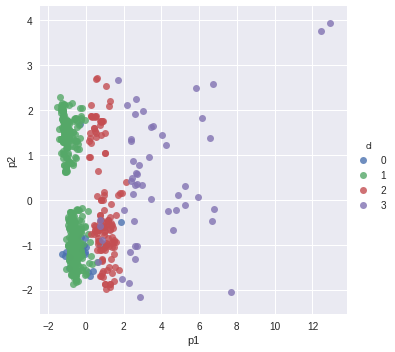

In [110]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False, hue='cl')

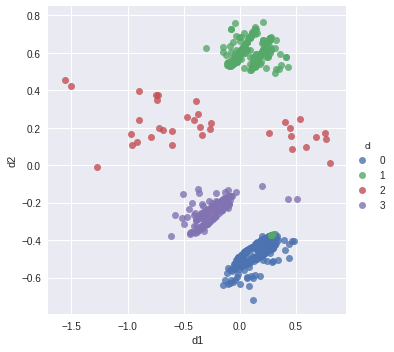

In [111]:
sns.lmplot(data=Xm, x='d1',y='d2',fit_reg=False, hue='cl')

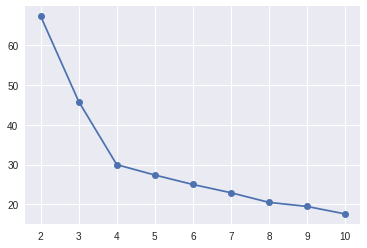

In [85]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xmm)
    lst_inertia.append(cl.inertia_)
plt.plot(range(2,11),lst_inertia,marker='o')

In [121]:
cl = GaussianMixture(n_components=4)

In [122]:
cl.fit(Xmm[var_cont])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [123]:
Xs["cl"]=Xmm['cl'] = df['cl'] = X["cl"]=cl.predict(Xmm[var_cont])

In [124]:
frecuencia(Xmm, columns="cl")

,cl,Conteo,Frecuencia
0,1,417,0.675851
1,3,128,0.207455
2,2,52,0.084279
3,0,20,0.032415


In [125]:
aux=X.copy()
aux["Hora Pro"]=aux["Hora Pro"].astype(int).copy()
frecuencia(aux, "Hora Pro")

,Hora Pro,Conteo,Frecuencia
0,11,109,0.176661
1,10,102,0.165316
2,12,93,0.150729
3,9,89,0.144246
4,14,76,0.123177
5,8,71,0.115073
6,13,71,0.115073
7,15,5,0.008104
8,7,1,0.001621


In [126]:
Xs[['cl']+var_cont].groupby('cl').mean()

,Dinero gastado,Total personas,Total Hombres,Total Mujeres,Hora Pro
cl,,,,,
0,-0.225609,-0.198764,-0.129385,0.086539,0.994521
1,-0.410006,-0.475598,-0.243878,-0.321162,-0.109907
2,2.295215,2.335332,1.511135,1.220453,0.408551
3,0.438543,0.631738,0.200826,0.536955,0.036689


In [127]:
g=[]
for k in range(4):
    
    g.append(df[["Total Mujeres","Total Hombres", "cl"]][df["cl"]==k])

In [128]:
for k in g:
    
    k["Pareja"]=k["Total Mujeres"]+k["Total Hombres"]
    
    print k[k["Pareja"]==2].Pareja.count()
#0 Estudiante   
#1 Trabajador 
#2 Grupo de amigos
#3 Pareja

10
0
3
128


In [129]:
df.to_csv("Starbucks_Cluster_600.csv")